In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from dataloader.obj_detection import DataLoader

input_dim = 48

train_dir = "/home/minhhieu/Desktop/Hieu/datasets/DOTA/train_yolo/train"
test_dir = "/home/minhhieu/Desktop/Hieu/datasets/ChestXRay_annot/images/val"

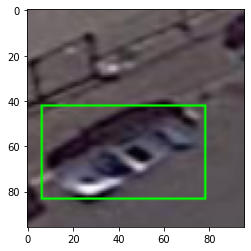

In [2]:
# Darknet with rectangle ground truth format
train_loader = DataLoader(train_dir, format_='darknet', 
                    color_space='rgb', img_size=input_dim*2, batch_size=64,
                   crop_to_bounding_box=False)

train_dataset = train_loader.get_train_dataset()
val_dataset = train_loader.get_val_dataset()

batch = next(iter(train_dataset))
img, (bbox, label) = batch
img = (img.numpy()[0] * 127.5 + 127.5).astype('uint8')
H, W = img.shape[:2]
x, y, w, h = (bbox.numpy()[0] * np.array([W, H, W, H])).astype('int')
img = cv2.rectangle(img, (x, y), (x+w, y+h), (0,255,0), 1)

plt.imshow(img)
plt.show()

In [3]:
# Darknet with corners ground truth format
train_loader = DataLoader(train_dir, format_='darknet', annot_format='corners',
                    color_space='rgb', img_size=input_dim*2, batch_size=64,
                   crop_to_bounding_box=False)

train_dataset = train_loader.get_train_dataset()
val_dataset = train_loader.get_val_dataset()

batch = next(iter(train_dataset))
img, (bbox, label) = batch
img = (img.numpy()[0] * 127.5 + 127.5).astype('uint8')
H, W = img.shape[:2]
x1, y1, x2, y2 = (bbox.numpy()[0] * np.array([W, H, W, H])).astype('int')
img = cv2.rectangle(img, (x1, y1), (x2, y2), (0,255,0), 1)

plt.imshow(img)
plt.show()

NameError: name 'boxes' is not defined